# PyBCSEIS使用例子
本例子主要包含以下几个内容：
1）输入数据格式介绍
2）BCSEIS互相关计算
3）结果绘图

## 1）输入数据格式介绍
ASDF数据格式能有效存储台站信息、事件信息、波形信息于一个文件，方便数据的共享的同时能有效提高处理效率。当前版本仅仅能处理当个asdf文档，需要前期处理将台站、地震目录、事件波形（或连续波形）整合到一个文件中

In [1]:
import os
import pyasdf

In [2]:
# 读取相应的ASDF格式数据文件
ds = pyasdf.ASDFDataSet('7yue.hdf5',mode='r')
print(ds)


ASDF file [format version: 1.0.3]: '7yue.hdf5' (92.2 MB)
	Contains 33 event(s)
	Contains waveform data from 26 station(s).


In [7]:
# 获取台站信息
station_coords = ds.get_all_coordinates()
station_coords

{'S1.BJH': {'latitude': 31.079999923706055,
  'longitude': 110.55999755859375,
  'elevation_in_m': 0.646},
 'S1.CJP': {'latitude': 31.010000228881836,
  'longitude': 110.6500015258789,
  'elevation_in_m': 0.248},
 'S1.DJW': {'latitude': 30.940000534057617,
  'longitude': 110.2300033569336,
  'elevation_in_m': 1.117},
 'S1.DPC': {'latitude': 31.040000915527344,
  'longitude': 110.30000305175781,
  'elevation_in_m': 0.207},
 'S1.DTP': {'latitude': 31.170000076293945,
  'longitude': 110.44000244140625,
  'elevation_in_m': 0.741},
 'S1.FJP': {'latitude': 31.030000686645508,
  'longitude': 110.47000122070312,
  'elevation_in_m': 0.352},
 'S1.GJY': {'latitude': 31.100000381469727,
  'longitude': 110.7699966430664,
  'elevation_in_m': 0.437},
 'S1.GQT': {'latitude': 31.219999313354492,
  'longitude': 110.54000091552734,
  'elevation_in_m': 0.769},
 'S1.JJP': {'latitude': 30.979999542236328,
  'longitude': 110.80999755859375,
  'elevation_in_m': 1.004},
 'S1.JWX': {'latitude': 30.8799991607666

99 Trace(s) in Stream:

S1.BJH.00.SHE | 2009-07-03T00:04:48.000000Z - 2009-07-03T00:06:47.995000Z | 200.0 Hz, 24000 samples
...
(97 other traces)
...
S1.BJH.00.SHZ | 2009-07-03T23:23:53.000000Z - 2009-07-03T23:25:52.995000Z | 200.0 Hz, 24000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


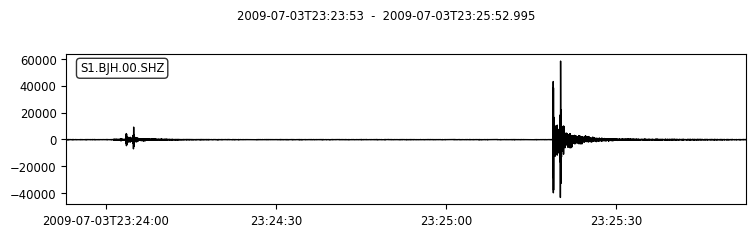

         network: S1
         station: BJH
        location: 00
         channel: SHZ
       starttime: 2009-07-03T23:23:53.000000Z
         endtime: 2009-07-03T23:25:52.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 24000
           calib: 1.0
         _format: ASDF
            asdf: AttribDict({'format_version': '1.0.3', 'tag': 'raw_recording'})


In [18]:
# 获取地震事件波形
st = ds.waveforms['S1.BJH'].raw_recording
print(st)
st[-1].plot()
print(st[-1].stats)

In [ ]:
## 2）BCSEIS 互相关计算
根据具体情况修改 PyBCSEIS.py相关参数，在linux下运行:python PyBCSEIS.py（bcseis程序包依赖于Linux系统）

### 第一步 BCSEIS文件夹系统
basedir = 'Sanxia' # 指定工作空间目录
print('Step1: making BCSEIS working...')
makeBCSEIS(bcseisdir=basedir)


### 第二步 格式转换
将ASDF格式的数据转换成BCSEIS相关的数据文件，地震目录和走时等信息的转换，同时对波形进行处理
asdf = '7yue.hdf5'
print('Step2: building Events...')
buildEvents(basedir=basedir,asdf=asdf)


### 第三步 台站记录震相统计与滤波
print('Step3: get Stations statics...')
getStaStat(basedir=basedir)


### 第四步 从波形文件中获取CC计算文件
print('Step4: calcCCEvInfo...')
calcCCEvInfo3(basedir=basedir)
这步可以从hypoDD中直接获取


### 第五步 运行BCSEIS
print('Sterp 5: Run BCSEIS...')
runBCSEIS(basedir=basedir)


### 第六步 生成 dt.cc
print('Step 6: get Dt from cc...')
ccInfo = getDtFromCC(basedir=basedir,option=0,lCCLim=0.5,cCCLim=0.7,uCCLim=0.8,diffLim=100,dtFile='dt_cc.cc0')
ccInfo = getDtFromCC(basedir=basedir,option=3,lCCLim=0.5,cCCLim=0.7,uCCLim=0.8,diffLim=100,dtFile='dt_bs.cc3') 

以上各个部分处理内容与BCSEIS原始pl脚本功能相同，其中具体参数具体含义可以参看相关脚本

## 3）绘制结果
画图过程中用到GMT的sac模块，需要安装GMT6以及pygmt
可运行python plotbcseis.py

In [26]:
lines = open('Sanxia/Events/WaveformCC/draw.cc3','r').readlines()
lines

['# 200900004 200900007 0.0\n',
 'BJH    -0.3300   0.8098   P\n',
 'CJP    -0.3300   0.8186   P\n',
 'FJP    -0.1500   0.7910   P\n',
 'MLC    -0.3017   0.9371   P\n',
 'PLT    -0.3120   0.8804   P\n',
 'TPX    -0.3350   0.7612   P\n',
 'YGT    -0.3343   0.9285   P\n',
 'BJH    -0.3350   0.9588   S\n',
 'CJP    -0.3400   0.8831   S\n',
 'FJP    -0.2750   0.8043   S\n',
 'PLT    -0.3050   0.8345   S\n',
 'TPX    -0.3450   0.8650   S\n',
 'YGT    -0.3550   0.7854   S\n',
 '# 200900007 200900015 0.0\n',
 'BJH    -0.4100   0.8716   P\n',
 'CJP    -0.4150   0.8780   P\n',
 'DTP    -0.4050   0.9581   P\n',
 'FJP    -0.4150   0.8902   P\n',
 'LPT    -0.4100   0.8605   P\n',
 'PLT    -0.4141   0.9026   P\n',
 'TPX    -0.4157   0.8770   P\n',
 'YGT    -0.4150   0.9476   P\n',
 'BJH    -0.4000   0.9415   S\n',
 'CJP    -0.4150   0.9571   S\n',
 'DTP    -0.4000   0.9572   S\n',
 'FJP    -0.4049   0.8595   S\n',
 'LPT    -0.4078   0.9183   S\n',
 'PLT    -0.4135   0.9038   S\n',
 'TPX    -0.4250  

In [27]:
# plot the CC
import pygmt
import os
from obspy import read

basedir = 'Sanxia'
# 定义需要绘图的文件
# draw.cc3文件格式与dt.cc一致，绘图实例
ccfile = basedir+os.sep+'Events'+os.sep+'WaveformCC'+os.sep+'draw.cc3'
dirf = basedir+os.sep+'Events'+os.sep+'IdDirFiles'+os.sep+'iddir.dat'
pygmt.config(FONT='7p,black',FONT_ANNOT='7p,black',FONT_LABEL='7p,black')
with open(ccfile,'r') as f:
    for line in f:
        flag = line[0]
        if flag == '#' :
            flag,id1,id2,tt = line.split()
        else:
            sta,dt,cc,pha = line.split()
            with open(dirf,'r') as f1:
                for line1 in f1:
                    flag1,dirs = line1.split()
                    if flag1 == id1:
                        dir1 = dirs
                    if flag1 == id2:
                        dir2 = dirs
            sac1 = basedir+os.sep+'Events'+os.sep+'Data'+os.sep+dir1+os.sep+'filt.'+sta+'.Z.SAC'
            sac2 = basedir+os.sep+'Events'+os.sep+'Data'+os.sep+dir2+os.sep+'filt.'+sta+'.Z.SAC'
            #print(sac1,sac2)
            title3 = "CC="+str(cc)+",DT="+str(dt)
            if pha == "P":
                name = "figures"+os.sep+sta+'_P_'+str(id1)+'_'+str(id2)
                tr1 = read(sac1)[0]
                tp = tr1.stats.sac.a
                tr2 = read(sac2)[0]
                tp1 = tr2.stats.sac.a
            if pha == 'S':
                name = "figures"+os.sep+sta+'_S_'+str(id1)+'_'+str(id2)
                tr1 = read(sac1)[0]
                tp = tr1.stats.sac.t0
                tr2 = read(sac2)[0]
                tp1 = tr2.stats.sac.t0
            # 设置时窗长度，注意与实际计算长度对应
            t1 = tp - 0.15
            t2 = tp + 0.485
            t11 = tp1 - 0.15
            t21 = tp1 + 0.485
            dtt = tp - tp1
            title4 = "CAT_DT="+str(dtt)
            # 绘制地震波形
            print(name)
            fig = pygmt.Figure()
            fig.basemap(region=[t1,t2,-5000,5000],projection='X2.5i/0.8i',frame=['xa0.1','ya1000+lCounts','N'])
            with pygmt.clib.Session() as ses:
                cmd = "%s -C%f/%f -Tt-3 -W0.5p,black -M1 -Fr" %(sac1,t1,t2)
                ses.call_module('sac',cmd)
            fig.plot(x=[tp,tp],y=[0,5000],pen='0.5p,black')
            fig.text(x=tp,y=4000,text=pha+'='+str(tp),font='7p',justify='LM',offset='j0.1c/0.0c')
            fig.text(x=t1,y=3500,text=id1,font='7p',justify='LM')
            with pygmt.config(MAP_FRAME_PEN='thinner,red',MAP_FRAME_WIDTH='1p',MAP_TICK_PEN='red',FONT='7p,red'):
                fig.basemap(region=[t11,t21,-5000,5000],projection='X2.5i/0.8i',frame=['xa0.1','ya1000+lCounts','S'])
                with pygmt.clib.Session() as ses:
                    cmd = "%s -C%f/%f -Tt-3 -W0.5p,red -M1 -Fr" %(sac2,t11,t21)
                    ses.call_module('sac',cmd)
                fig.plot(x=[tp1,tp1],y=[-5000,0],pen='0.5p,red')
                fig.text(x=tp1,y=-4000,text=pha+'='+str(tp1),font='7p,red',justify='LM',offset='j0.1c/0.0c')
                fig.text(x=t11,y=2000,text=id2,font='7p,red',justify='LM')
            fig.text(x=t11,y=-3000,text=sta,font='10p,black',justify='LM')
            # 绘制第二个波形
            fig.shift_origin(yshift='-1.0i')
            fig.basemap(region=[t1,t2,-5000,5000],projection='X2.5i/0.8i',frame=['xa0.1+lTime(s)','ya1000+lCounts','S'])
            with pygmt.clib.Session() as ses:
                cmd = "%s -C%f/%f -Tt-3 -W0.5p,black -M1 -Fr" %(sac1,t1,t2)
                ses.call_module('sac',cmd)
                cmd = "%s -C%f/%f -Tt-3+s%f -W0.5p,red -M1 -Fr" %(sac2,t1,t2,float(dt))
                ses.call_module('sac',cmd)
            fig.text(x=t1,y=-2000,text=title3,font='7p',justify='LM')
            fig.text(x=t1,y=-4000,text=title4,font='7p',justify='LM')
            #fig.show()
            fig.savefig(name+'.png')
            fig.savefig(name+'.pdf')

figures\BJH_P_200900004_200900007
figures\CJP_P_200900004_200900007
figures\FJP_P_200900004_200900007
figures\MLC_P_200900004_200900007
figures\PLT_P_200900004_200900007
figures\TPX_P_200900004_200900007
figures\YGT_P_200900004_200900007
figures\BJH_S_200900004_200900007
figures\CJP_S_200900004_200900007
figures\FJP_S_200900004_200900007
figures\PLT_S_200900004_200900007
figures\TPX_S_200900004_200900007
figures\YGT_S_200900004_200900007
figures\BJH_P_200900007_200900015
figures\CJP_P_200900007_200900015
figures\DTP_P_200900007_200900015
figures\FJP_P_200900007_200900015
figures\LPT_P_200900007_200900015
figures\PLT_P_200900007_200900015
figures\TPX_P_200900007_200900015
figures\YGT_P_200900007_200900015
figures\BJH_S_200900007_200900015
figures\CJP_S_200900007_200900015
figures\DTP_S_200900007_200900015
figures\FJP_S_200900007_200900015
figures\LPT_S_200900007_200900015
figures\PLT_S_200900007_200900015
figures\TPX_S_200900007_200900015
figures\YGT_S_200900007_200900015
